# Groepsopdrachten les 1 ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# Wat is het probleem?

Op basis van de dataset over de Iris bloemen moeten de verschillende species geïdentificeerd worden. 
De uitkomsten moeten geclassificeerd worden met K-Means clustering.
Uiteindelijk moeten er relevante groepen worden geclassificeerd.

Onderzoeksvraag: Zitten er betekenisvolle groepen in de dataset?

# Data verzamelen

In [2]:
# Load the data
data = pd.read_csv('Iris_with_outliers.csv')

# Remove the labels
data = data.drop('Species', axis=1)

display(data.head())

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,0,5.1,3.5,1.4,0.2
1,1,1,4.7,3.2,1.6,0.2
2,2,2,4.9,3.1,1.5,0.1
3,3,3,4.4,2.9,1.4,0.2
4,4,4,5.0,3.4,1.5,0.2


# Data visualisatie

Unnamed: 0       86.000000
Id               86.000000
SepalLengthCm     5.834118
SepalWidthCm      3.068605
PetalLengthCm     3.718935
PetalWidthCm      1.171345
dtype: float64
     Unnamed: 0   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
20           20   20            5.8           4.0            1.2           0.2
32           32   32            5.2           4.1            1.5           0.1
33           33   33            5.5           4.2            1.4           0.2
56           56   56            5.7           4.4            1.5           0.4
90           90   90            5.0           2.0            3.5           1.0
91           91   91            5.7           4.4            1.5           0.4
115         115  115            8.0           2.9            4.3           1.3
121         121  121            7.6           3.0            6.6           2.1
125         125  125            7.7           3.8            6.7           2.2
136         136  136            7

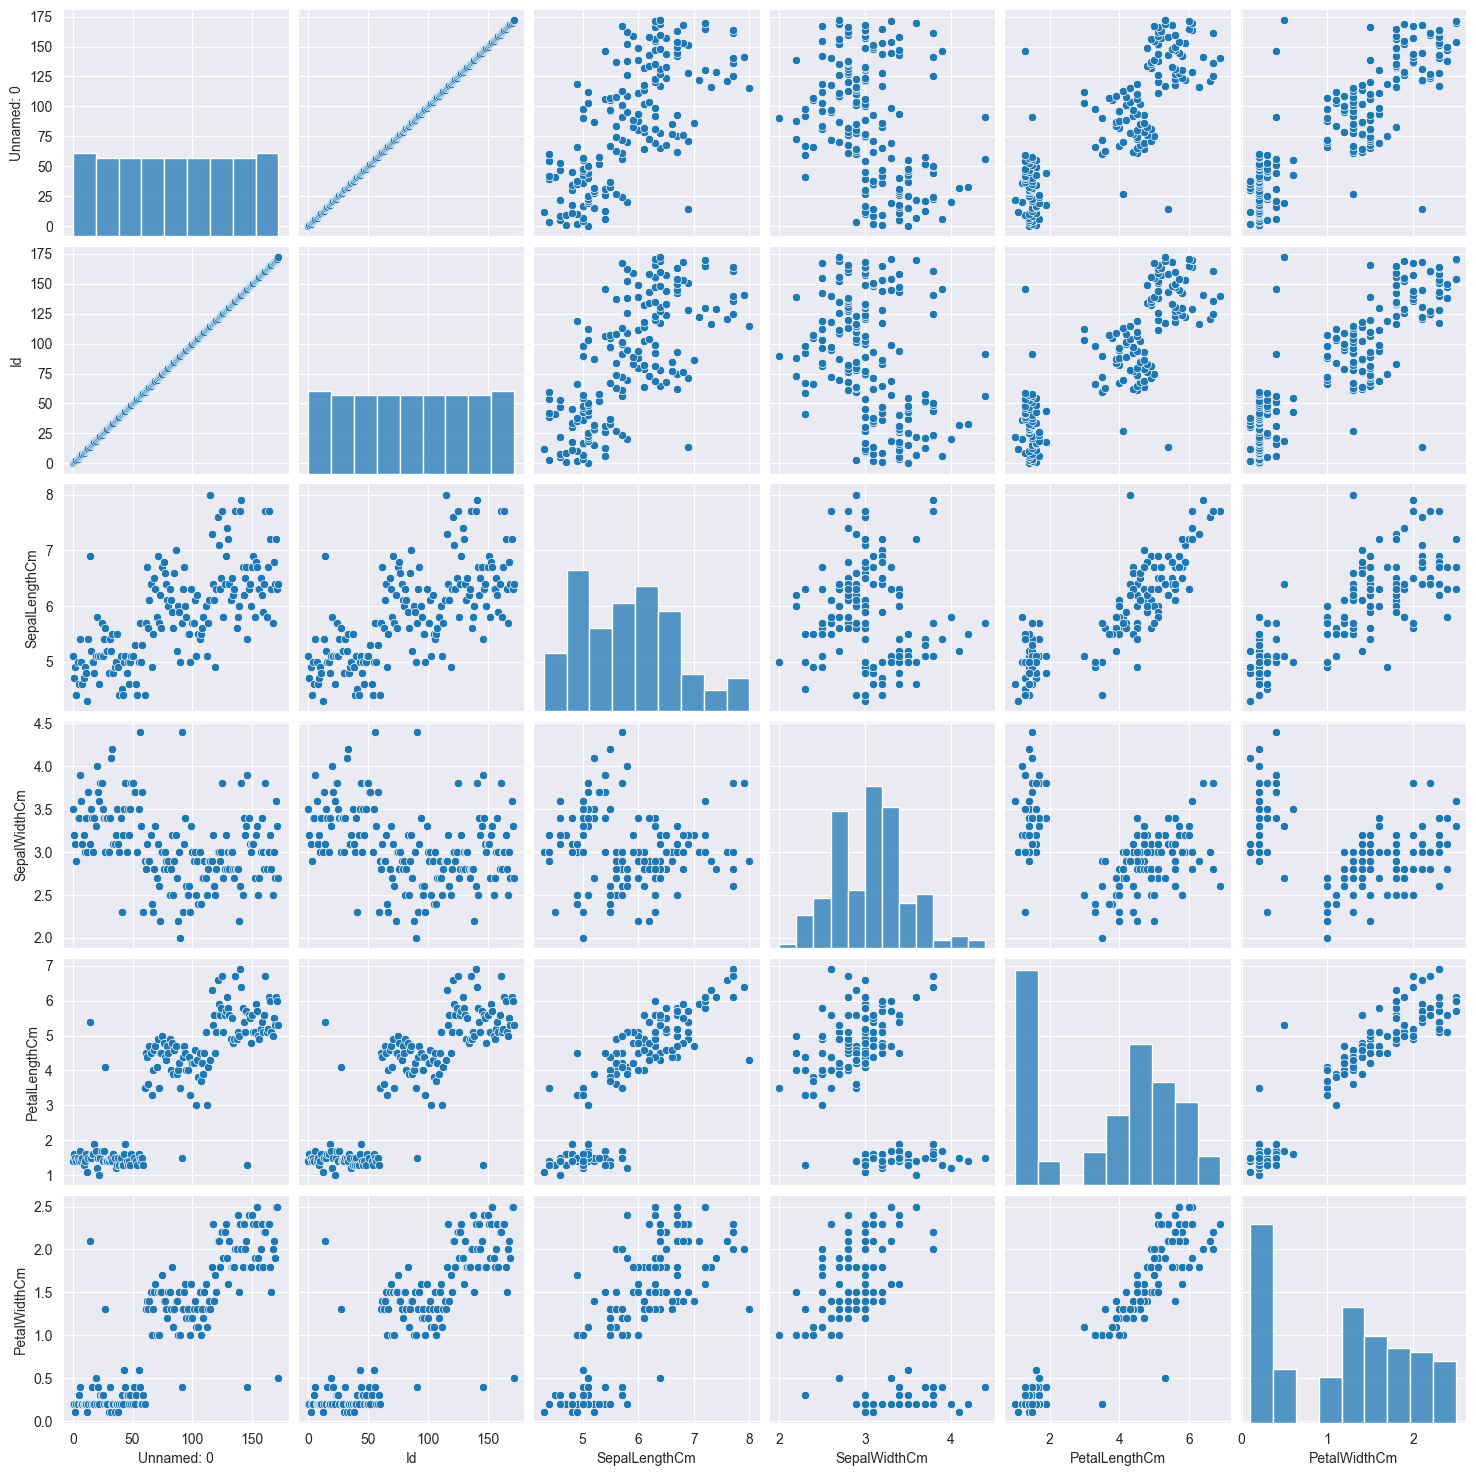

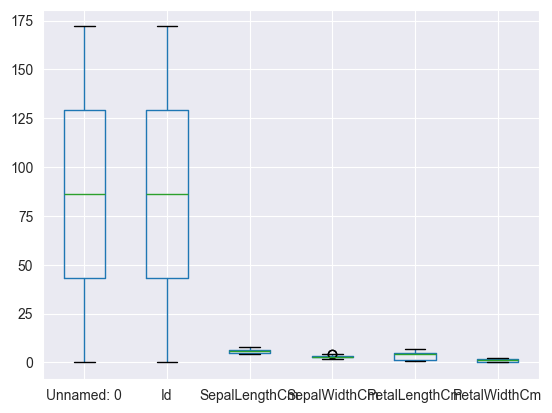

In [3]:
# Calculate means, Standarddeviations and outliers
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(means)
print(outliers)
print(stds)

# Visualize the dataset
sns.pairplot(data)
plt.show()

# Make a box plot
data.boxplot()
plt.show()

# Data opschonen en voorbereiden

In [4]:
# Search NaN and 0 values
print(data.isnull().sum())
print((data == 0).sum())

# Replace NaN and 0 values
data = data.replace(0, np.nan)
data = data.fillna(data.mean())

# Remove the unnamed and ID columns
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Id', axis=1)

Unnamed: 0       0
Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
dtype: int64
Unnamed: 0       1
Id               1
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [5]:
display(data.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.7,3.2,1.6,0.2
2,4.9,3.1,1.5,0.1
3,4.4,2.9,1.4,0.2
4,5.0,3.4,1.5,0.2


In [6]:
# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Selecteer het model

In [7]:
# Make a kmeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# Train en test het model

In [8]:
# Train and test the model
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
y_train = kmeans.predict(X_train)
y_test = kmeans.predict(X_test)

# Analyseer en evalueer het model

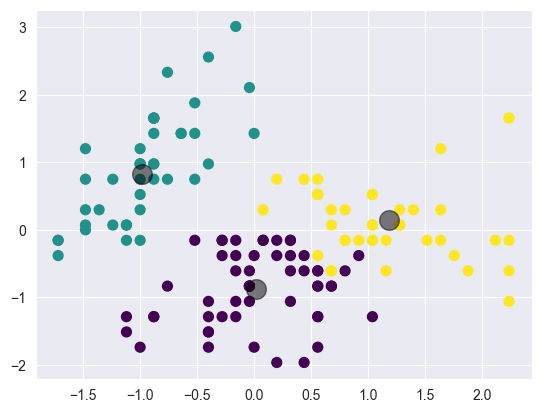

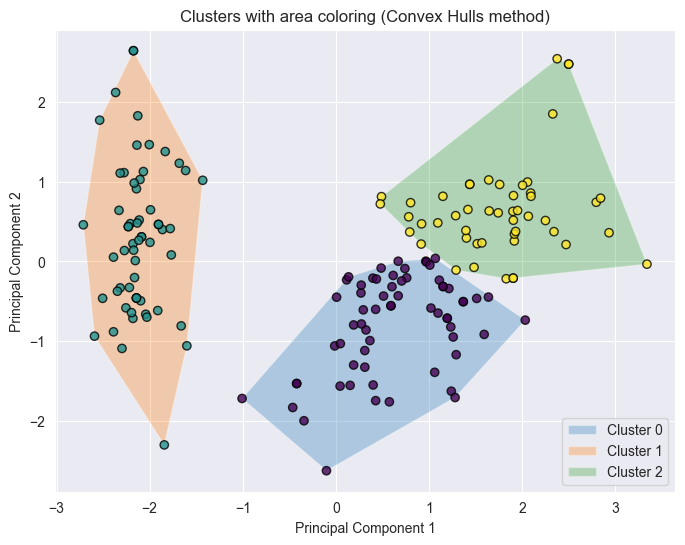

In [9]:
# Analyse the results visually
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

# Apply PCA to the normalized data (data) to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

plt.figure(figsize=(8, 6))

# Plot convex hulls for each cluster if possible
for cluster_label in np.unique(y_kmeans):
    # Select points in the current cluster
    cluster_points = X_pca[y_kmeans == cluster_label]
    
    if len(cluster_points) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 0], hull_points[:, 1], alpha=0.3, label=f'Cluster {cluster_label}')

# Scatter plot of the PCA-transformed data, colored by cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('Clusters with area coloring (Convex Hulls method)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Vinden van de perfecte K-waarde

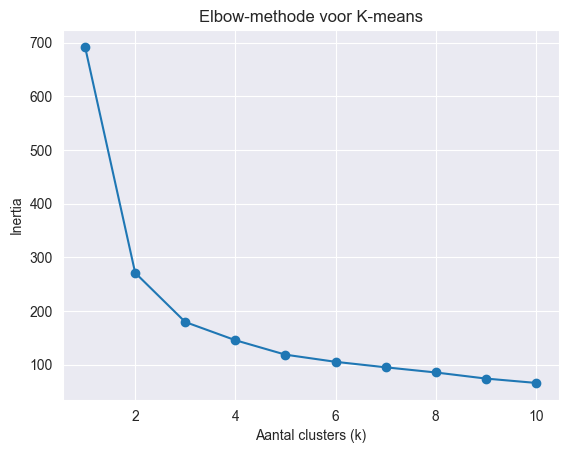

In [10]:
# Test meerdere k-waardes
inertia = []
K_range = range(1, 11)  # Test k van 1 tot 10
 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
 
# Plot de Elbow-methode
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Aantal clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow-methode voor K-means')
plt.show()

# Verbeter het model

## Changes
- Removed random state for K Means initialization, since it's not used.
- Tried 4 clusters, but the scatter plots and cluster plots suggest that only 3 clusters are more accurate. With 2 clusters, 1 of the clusters is spread out and is not really a cluster anymore.
- According to the elbow in the elbow plot, 3 is also the most accurate amount of clusters
- Tried removing and adding the unnamed and ID columns, but it made no difference.